# Gradient Descent Julia Animation #

This piece of Julia code visualises the gradient descent algorithm as an animation on a simple plane u. The gradient of this function was manually solved, so in any way changing the function usol(x, y) does not maintain correct functionality.

Please note that the kernel for this Jupyter notebook is Julia (not Python). The user is able to tune the learning rate, maximum iterations and starting point of the algorithm. it is suggested to use this notebook within google colab so one does not need to worry about having the required libraries. 



┌ Info: Saved animation to c:\Users\luisb\Desktop\Github\GradientDescent\gradient_descent_animation.gif
└ @ Plots C:\Users\luisb\.julia\packages\Plots\ocKqQ\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\luisb\\Desktop\\Github\\GradientDescent\\gradient_descent_animation.gif")
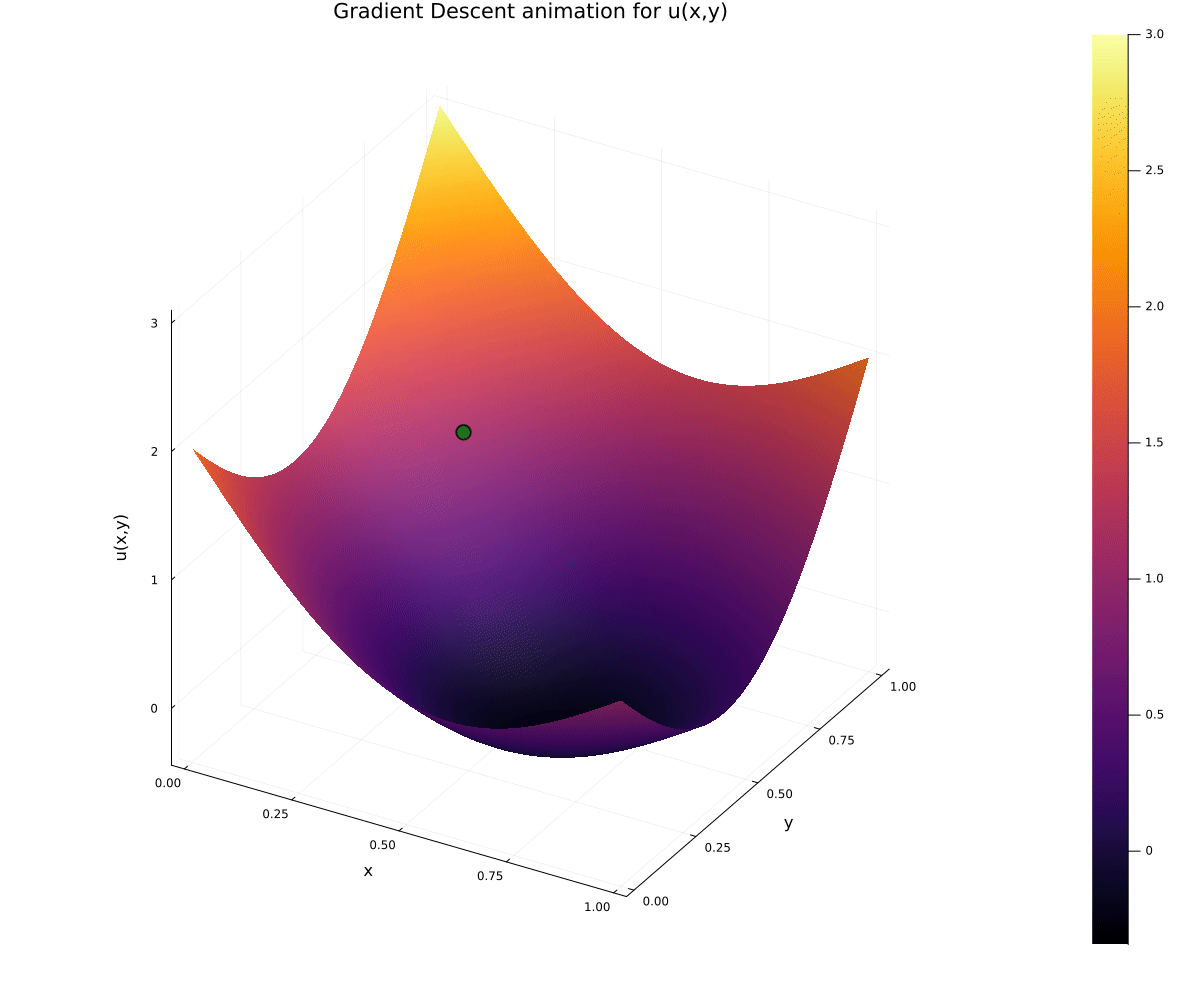

In [6]:
using Plots
using Random

# Define the function and its gradients
usol(x, y) = -sinpi(x) - sinpi(y) + 2 + y^2 - x

# Manually computed gradients
function grad_usol(x, y)
    dx = -pi * cospi(x) - 1
    dy = -pi * cospi(y) + 2 * y
    return dx, dy
end


# Parameters for the grid
N = 100  # Number of points in x-direction
M = 100  # Number of points in y-direction
rangeVar = 1  # Maximum value for x and y

# Define the x and y grids
x_vals = range(0, stop=rangeVar, length=N)
y_vals = range(0, stop=rangeVar, length=M)

# Create a matrix to store the function values
u_vals = [usol(x, y) for y in y_vals, x in x_vals]

# Gradient descent parameters
learning_rate = 0.01
num_iterations = 50

# Initialize a random starting point within the range [0, rangeVar] for x and y
###x_point = rand() * rangeVar
###y_point = rand() * rangeVar

# Set custom starting point
x_point = 0.2
y_point = 0.75


# Store the descent path for plotting
descent_path = [(x_point, y_point, usol(x_point, y_point))]

# Perform gradient descent and record each step
for _ in 1:num_iterations
    # Compute the gradient at the current point
    dx, dy = grad_usol(x_point, y_point)
    
    # Update the point based on the gradient
    x_point -= learning_rate * dx
    y_point -= learning_rate * dy
    
    # Store the new point in the descent path
    push!(descent_path, (x_point, y_point, usol(x_point, y_point)))
end

# Create an animation
anim = @animate for i in 1:length(descent_path)
    # Plot the surface
    p = plot(
        x_vals, y_vals, u_vals,
        st=:surface,
        xlabel="x", ylabel="y", zlabel="u(x,y)",
        title="Gradient Descent animation for u(x,y)",
        size=(1200, 1000)
    )

    # Plot each point in the descent path up to the current frame
    for j in 1:i
        x, y, z = descent_path[j]
        scatter!(
            p, [x], [y], [z],
            marker=:circle, markersize=8,  # Increase marker size for visibility
            color=:green,                  # Set color to bright green
            alpha=0.8,                     # Slight transparency for visibility
            label=false
        )
    end
end

# Save the animation as a GIF
gif(anim, "gradient_descent_animation.gif", fps=10)
